In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
from pathlib import Path
import datetime as dt
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import json


In [3]:
def load_ior_summary_list(json_file: Path):
    try:
        data = json.loads(json_file.read_text())
        return [
            {
                'Version': data['Version'],
                'Began': data['Began'],
                'Command line': data['Command line'],
                'Machine': data['Machine'],
                'Finished': data['Finished'],
                **{f'test_{k}': v for k, v in test.items() if k not in ["Results", "max", "Parameters", "Options"]},
                **{f"max_{k}": v for k, v in test["max"].items()},
                **{f"Parameters_{k}": v for k, v in test["Parameters"].items()},
                **{f"Options_{k}": v for k, v in test["Options"].items()},
                **{f'summary_{k}': v for k, v in data['summary'][index].items()},
                **{f'result_{k}': v for k, v in result.items()},
                'iorIteration': iteration,
            }
            for index, test in enumerate(data['tests'])
            for iteration, results in enumerate(test["Results"]) # iteration ?
            for result in results
        ]
    except Exception as e:
        print(f"Error processing file {json_file}: {e}")
        return []


In [4]:
IOR_OUTPUT_DIR = Path("../raw/ior")

df_src = pl.DataFrame([
    log
    for log_dir in IOR_OUTPUT_DIR.glob("*")
    for json in log_dir.glob("ior_summary_*.json")
    for log in load_ior_summary_list(json)
])

df_src.head(5)

Version,Began,Command line,Machine,Finished,test_TestID,test_StartTime,test_Path,test_Capacity,test_Used Capacity,test_Inodes,test_Used Inodes,max_writeMiB,max_writeMB,Parameters_testID,Parameters_refnum,Parameters_api,Parameters_platform,Parameters_testFileName,Parameters_hintsFileName,Parameters_deadlineForStonewall,Parameters_stoneWallingWearOut,Parameters_maxTimeDuration,Parameters_outlierThreshold,Parameters_options,Parameters_dryRun,Parameters_nodes,Parameters_memoryPerTask,Parameters_memoryPerNode,Parameters_tasksPerNode,Parameters_repetitions,Parameters_multiFile,Parameters_interTestDelay,Parameters_fsync,Parameters_fsyncperwrite,Parameters_useExistingTestFile,Parameters_showHints,…,summary_TestID,summary_ReferenceNumber,summary_segmentCount,summary_blockSize,summary_transferSize,summary_numTasks,summary_tasksPerNode,summary_repetitions,summary_filePerProc,summary_reorderTasks,summary_taskPerNodeOffset,summary_reorderTasksRandom,summary_reorderTasksRandomSeed,summary_bwMaxMIB,summary_bwMinMIB,summary_bwMeanMIB,summary_bwStdMIB,summary_OPsMax,summary_OPsMin,summary_OPsMean,summary_OPsSD,summary_MeanTime,summary_xsizeMiB,result_access,result_bwMiB,result_blockKiB,result_xferKiB,result_iops,result_latency,result_openTime,result_wrRdTime,result_closeTime,result_totalTime,iorIteration,max_readMiB,max_readMB,Options_task offset
str,str,str,str,str,i64,str,str,str,str,str,str,f64,f64,i64,i64,str,str,str,str,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,i64
"""3.3.0""","""Thu May 16 11:32:02 2024""","""ior -a MPIIO -l timestamp -g -…","""Linux chris90""","""Thu May 16 11:32:30 2024""",0,"""Thu May 16 11:32:02 2024""","""/shared/fish/hiraga/work/peanu…","""54.6 TiB""","""34.8%""","""1117.6 Mi""","""3.4%""",23061.6193,24181.8605,0,0,"""MPIIO""","""chris(Linux)""","""/shared/fish/hiraga/work/peanu…","""(null)""",0,0,0,0,"""(null)""",0,2,0,0,16,1,0,0,1,0,0,0,…,0,0,1,21474836480,2097152,32,16,1,0,0,1,0,0,23061.6193,23061.6193,23061.6193,0.0,11530.8097,11530.8097,11530.8097,0.0,28.4178,655360.0,"""write""",23061.6193,2.097152e7,2048.0,11531.8812,0.0028,0.0023,28.4151,0.0003,28.4178,0,null,null,null
"""3.3.0""","""Thu May 16 11:33:21 2024""","""ior -a MPIIO -l timestamp -g -…","""Linux chris90""","""Thu May 16 11:33:50 2024""",0,"""Thu May 16 11:33:21 2024""","""/shared/fish/hiraga/work/peanu…","""54.6 TiB""","""34.8%""","""1117.6 Mi""","""3.4%""",null,null,0,0,"""MPIIO""","""chris(Linux)""","""/shared/fish/hiraga/work/peanu…","""(null)""",0,0,0,0,"""(null)""",0,2,0,0,16,1,0,0,1,0,0,0,…,0,0,1,21474836480,2097152,32,16,1,0,1,1,0,0,22558.1809,22558.1809,22558.1809,0.0,11279.0904,11279.0904,11279.0904,0.0,29.052,655360.0,"""read""",22558.1809,2.097152e7,2048.0,11279.5037,0.0028,0.0009,29.0509,0.0001,29.052,0,22558.1809,23653.9671,1
"""3.3.0""","""Thu May 16 11:34:35 2024""","""ior -a MPIIO -l timestamp -g -…","""Linux chris90""","""Thu May 16 11:34:45 2024""",0,"""Thu May 16 11:34:35 2024""","""/shared/fish/hiraga/work/peanu…","""54.6 TiB""","""34.8%""","""1117.6 Mi""","""3.4%""",null,null,0,0,"""MPIIO""","""chris(Linux)""","""/shared/fish/hiraga/work/peanu…","""(null)""",0,0,0,0,"""(null)""",0,2,0,0,16,1,0,0,1,0,0,0,…,0,0,1,21474836480,2097152,32,16,1,0,0,1,0,0,65599.2106,65599.2106,65599.2106,0.0,32799.6053,32799.6053,32799.6053,0.0,9.9904,655360.0,"""read""",65599.2106,2.097152e7,2048.0,32805.1524,0.001,0.0016,9.9887,0.0001,9.9904,0,65599.2106,68785.7578,null
"""3.3.0""","""Thu May 16 11:35:36 2024""","""ior -a MPIIO -l timestamp -g -…","""Linux chris90""","""Thu May 16 11:36:09 2024""",0,"""Thu May 16 11:35:36 2024""","""/shared/fish/hiraga/work/peanu…","""54.6 TiB""","""34.8%""","""1117.6 Mi""","""3.4%""",19489.8104,20436.5474,0,0,"""MPIIO""","""chris(Linux)""","""/shared/fish/hiraga/work/peanu…","""(null)""",0,0,0,0,"""(null)""",0,2,0,0,16,1,0,0,1,0,0,0,…,0,0,1,2147

Access: write, Remote: False


Options_nodes,256,512,1024,2048,4096,8192,16384,32768,47008,65536,131072,262144,524288,1048576,2097152
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,15023.4571,14422.8395,13794.2973,11902.7086,9134.5149,8804.3575,8713.2317,9576.6399,11274.3911,9983.3502,10281.4825,10032.0586,9806.1295,11101.7825,11681.8336
2,30187.8081,28798.1435,27678.9616,23824.6878,18224.6346,17575.9182,17381.3719,19039.8086,22409.9124,19864.7404,20488.3609,19831.256,19198.735,19489.8104,23061.6193


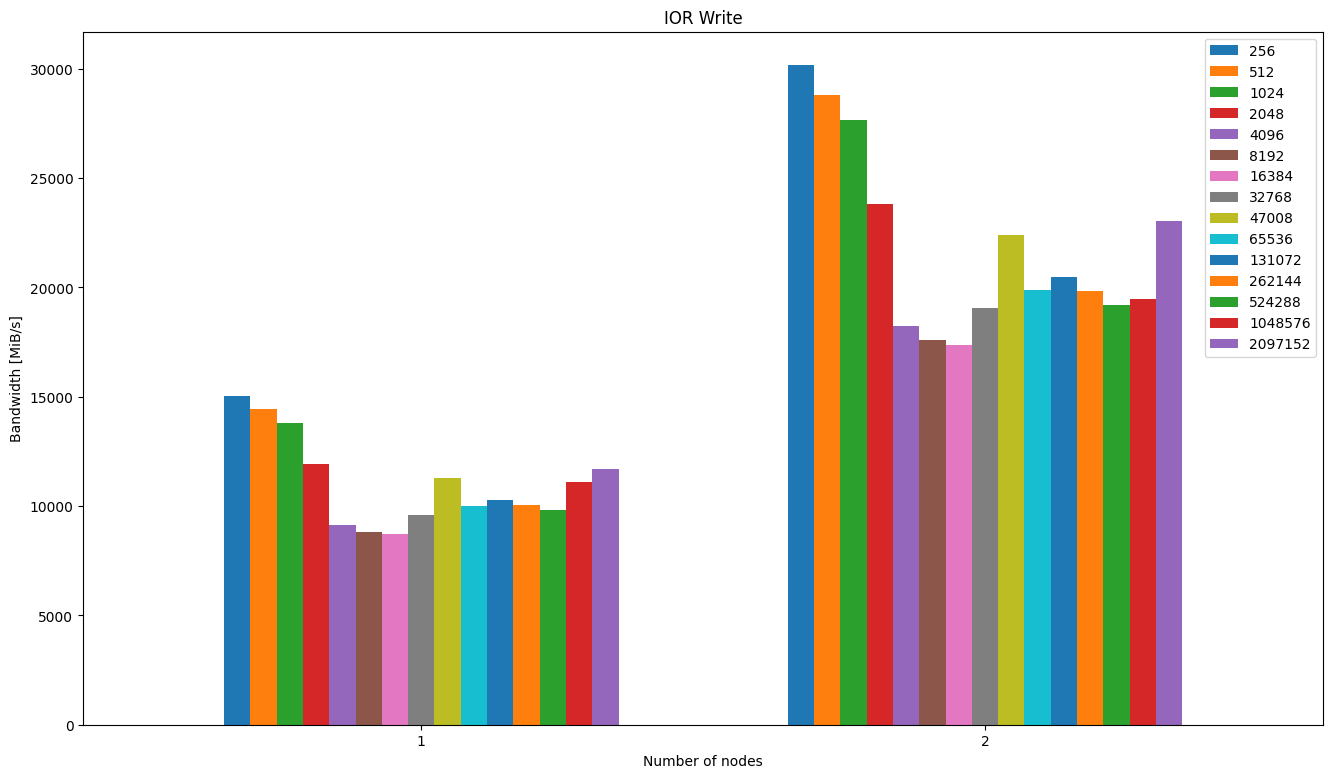

Access: read, Remote: True


Options_nodes,256,512,1024,2048,4096,8192,16384,32768,47008,65536,131072,262144,524288,1048576,2097152
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2894.692,5537.1261,9688.5743,14384.8764,21310.6061,22653.0901,22831.6617,22683.7019,22770.3767,22926.2417,22915.6607,22920.9466,22923.2641,22899.1129,22558.1809


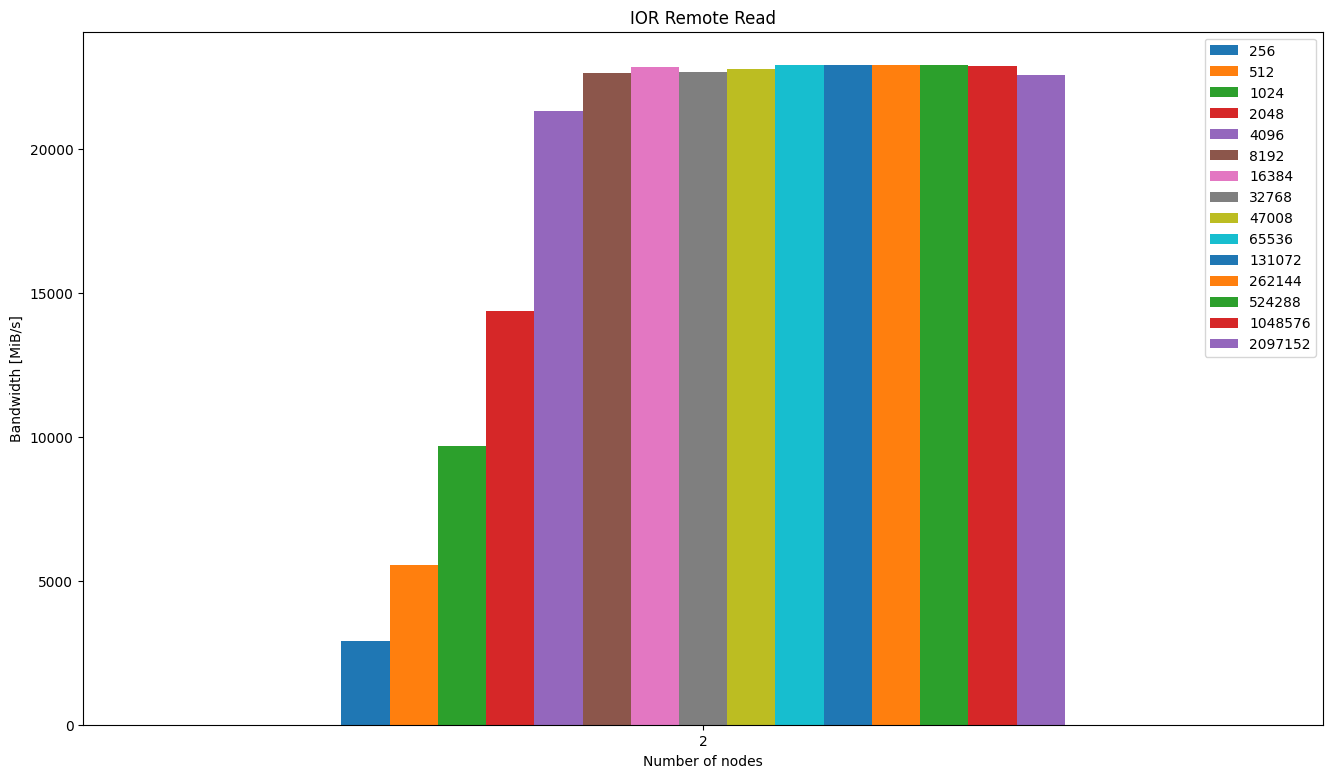

Access: read, Remote: False


Options_nodes,256,512,1024,2048,4096,8192,16384,32768,47008,65536,131072,262144,524288,1048576,2097152
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,23967.5711,24527.4205,24613.1785,24815.138,19745.0258,33348.7308,30495.744,37143.8696,40901.1851,39242.252,40743.1862,41944.3234,42412.5489,42121.5179,32782.181
2,50366.4806,48352.8955,49206.1773,49494.4266,39501.5765,66579.021,60881.9314,74008.6706,80836.3352,77316.5087,80642.3641,82551.3761,82991.6159,82265.0919,65599.2106


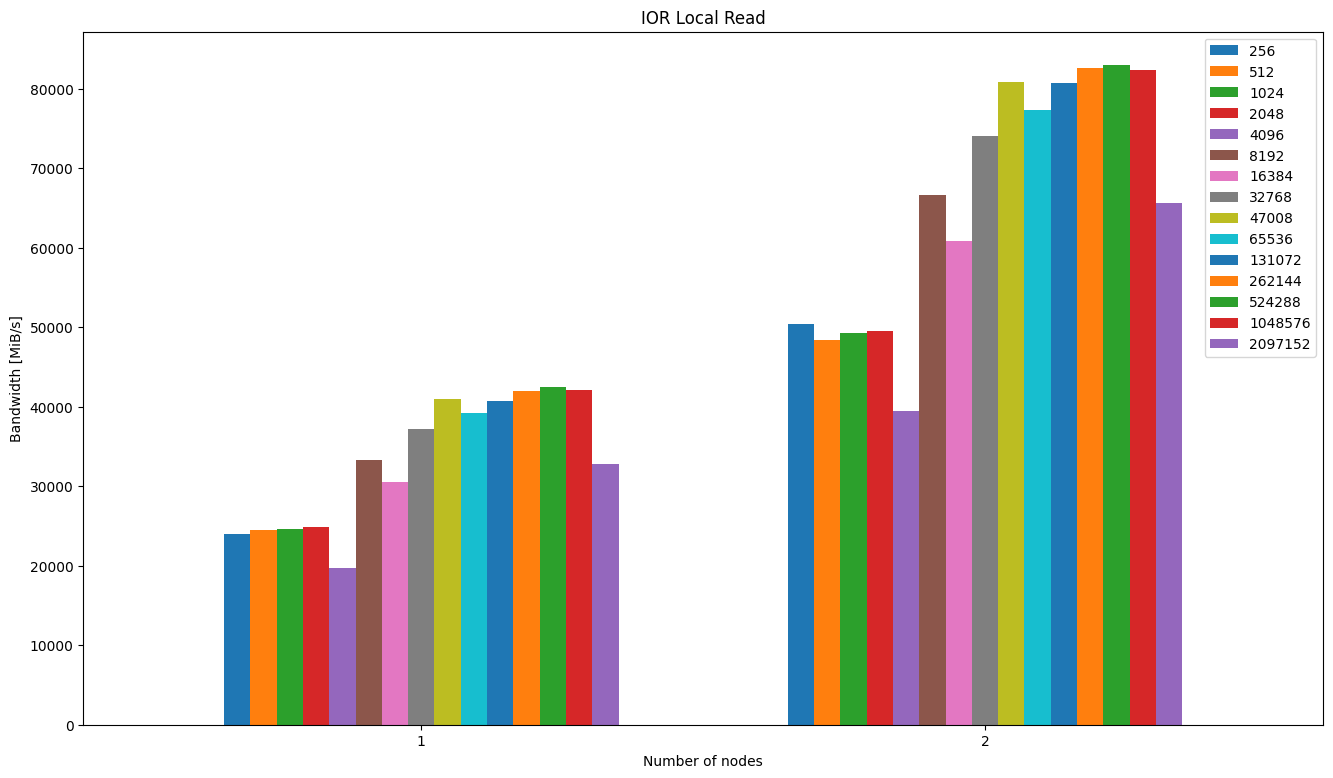

In [5]:
df = df_src

groupby_columns=[
    "Options_nodes",
    "summary_numTasks",
    "summary_reorderTasks",
    "summary_transferSize",
    "result_access",
]

df_plot = (
    df
    .with_columns(
        pl.col("summary_reorderTasks").cast(pl.Boolean),
    )
    .group_by(groupby_columns)
    .agg([
        pl.mean("result_bwMiB").alias("result_bwMiB_mean"),
    ])
)

for access, remote in [("write", False), ("read", True), ("read", False)]:
    print(f"Access: {access}, Remote: {remote}")
    fig = plt.figure(figsize=(16, 9), dpi=100)
    fig.patch.set_alpha(1)
    ax = (
        df_plot
        .filter((pl.col("result_access") == access) & (pl.col("summary_reorderTasks") == remote))
        .sort(["Options_nodes", "summary_transferSize"])
        .pipe(lambda df: df.filter(pl.col("Options_nodes") >= 2) if access == "read" and remote else df)
        .pivot(values="result_bwMiB_mean", index="Options_nodes", columns="summary_transferSize")
        .pipe(lambda df: (display(df), df)[-1])
        .to_pandas()
        .set_index("Options_nodes")
        .plot(
            ax=fig.add_subplot(),
            kind="bar",
            xlabel="Number of nodes",
            ylabel="Bandwidth [MiB/s]",
            rot=0,
            width=0.7,
        )
    )
    title = ""
    if access == "write":
        title = "Write"
    elif remote:
        title = "Remote Read"
    else:
        title ="Local Read"
    ax.set_title(f"IOR {title}")
    plt.show()
